In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [126]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


```seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)```

**relplot常用参数**
- x: x轴
- y: y轴
- hue: 在某一维度上，用颜色区分
- style: 在某一维度上, 用线的不同表现形式区分, 如 点线, 虚线等
- size: 控制数据点大小或者线条粗细
- col: 列上的子图
- row: 行上的子图
- kind: kind= ‘scatter’(默认值)
   kind='line’时候，可以通过参数ci：(confidence interval)参数，来控制阴影部分，如，- - ci=‘sd’ （一个x有多个y值,也可以关闭数据聚合功能(urn off aggregation altogether), 设置estimator=None即可
- 图片大小
- 宽高比

# 散点图

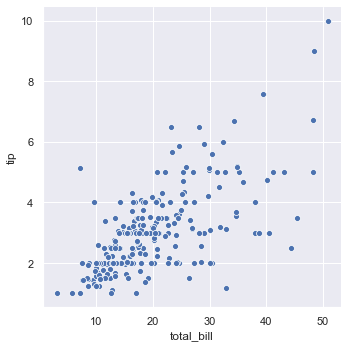

In [127]:
sns.relplot(x="total_bill", y="tip", data=tips)

通过根据第三个变量为点着色来将另一个维度添加到图中

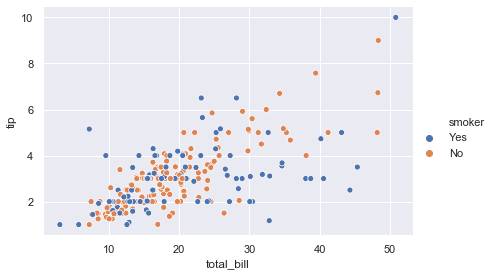

In [75]:
sns.relplot(x="total_bill", y="tip", hue='smoker',data=tips,height=4,aspect=1.5)

为了强调类之间的区别并提高可访问性，可以为每个类使用不同的标记样式

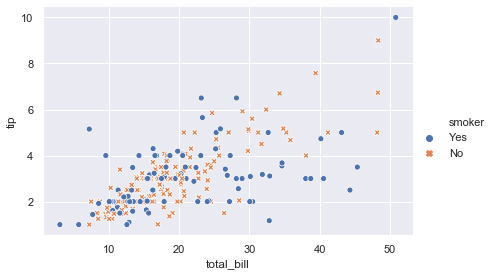

In [76]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips,height=4,aspect=1.5)

第三种语义变量更改每个点的大小

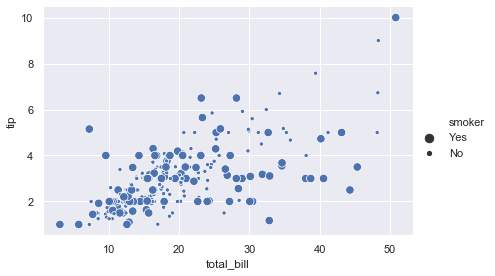

In [88]:
sns.relplot(x="total_bill", y="tip", size="smoker", data=tips,height=4,aspect=1.5)

# 线图

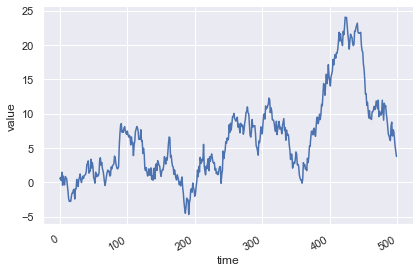

In [91]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df,height=4,aspect=1.5)
g.fig.autofmt_xdate()

因为relplot()假定您最经常尝试根据绘制y函数x，所以默认行为是x在绘制之前按值对数据进行排序。但是，可以将其禁用：

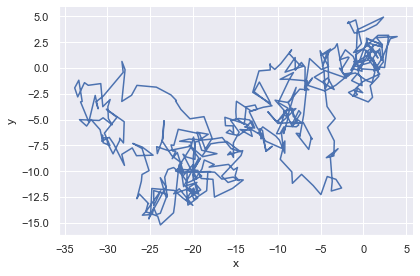

In [92]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df,height=4,aspect=1.5)

对于x变量相同的值，更复杂的数据集将具有多个度量。seaborn的默认行为是x通过绘制均值和均值周围的95％置信区间来汇总每个值的多次测量

In [108]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


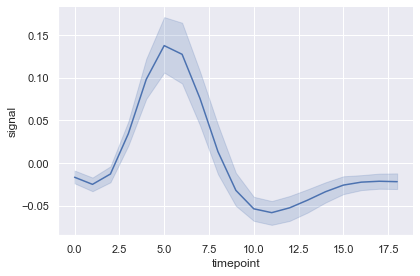

In [109]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri,height=4,aspect=1.5)

使用自举计算置信区间，对于较大的数据集，这可能会占用大量时间。因此可以禁用它们

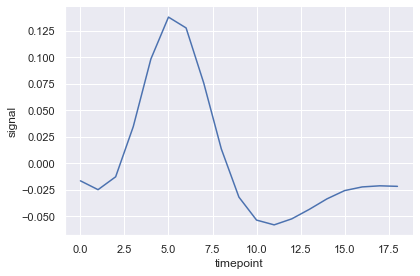

In [110]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri,height=4,aspect=1.5)

另一个很好的选择，尤其是对于较大的数据，尤其是通过绘制标准偏差而不是置信区间来表示每个时间点的分布范围

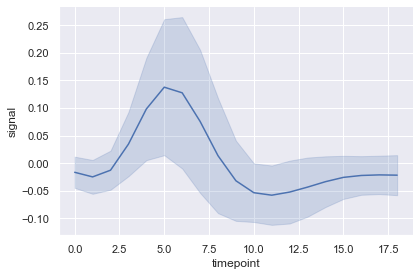

In [111]:
sns.relplot(x="timepoint", y="signal", ci='sd', kind="line", data=fmri,height=4,aspect=1.5)

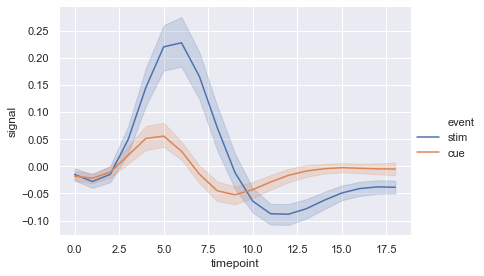

In [115]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri,height=4,aspect=1.5)

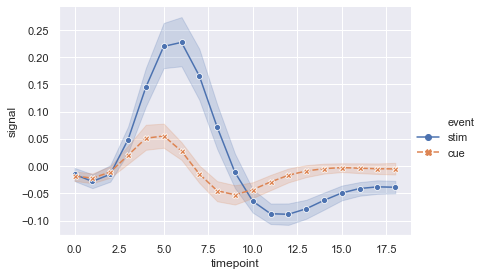

In [116]:
sns.relplot(x="timepoint", y="signal",markers=True, hue="event",style="event", kind="line", data=fmri,height=4,aspect=1.5)

# 展示多重关系

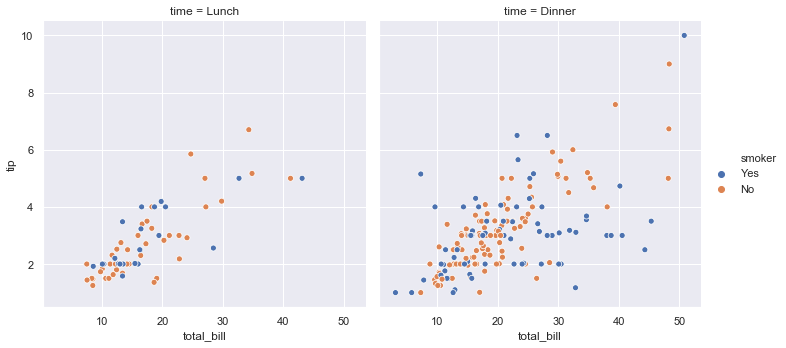

In [117]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips)

您还可以通过以下方式显示影响力的两个变量：一个通过在列上刻面而在一个行上刻面。当您开始向网格中添加更多变量时，您可能希望减小图形尺寸

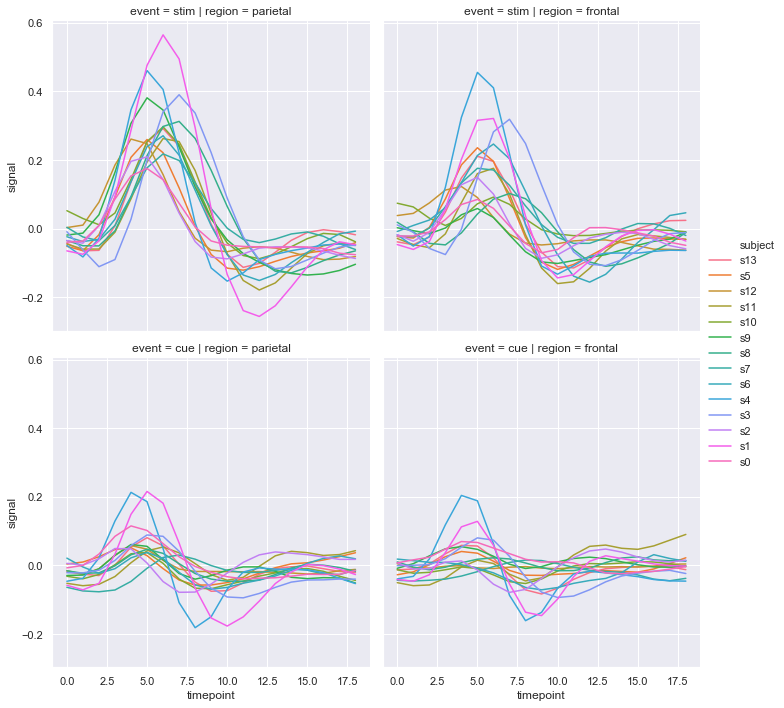

In [121]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri)

当您想检查变量的多个级别上的效果时，最好在列上对该变量进行构面，然后将其“包装”到行中

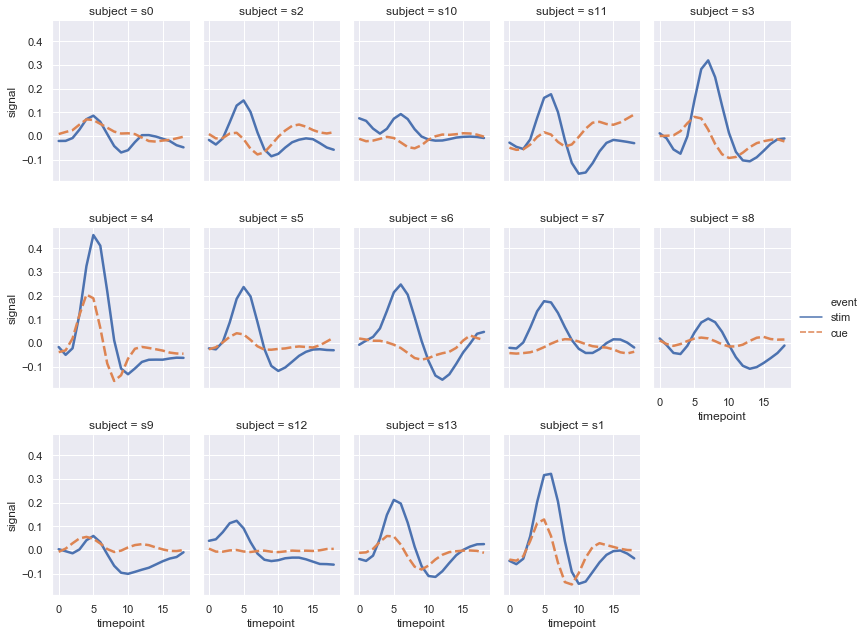

In [124]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# 子图

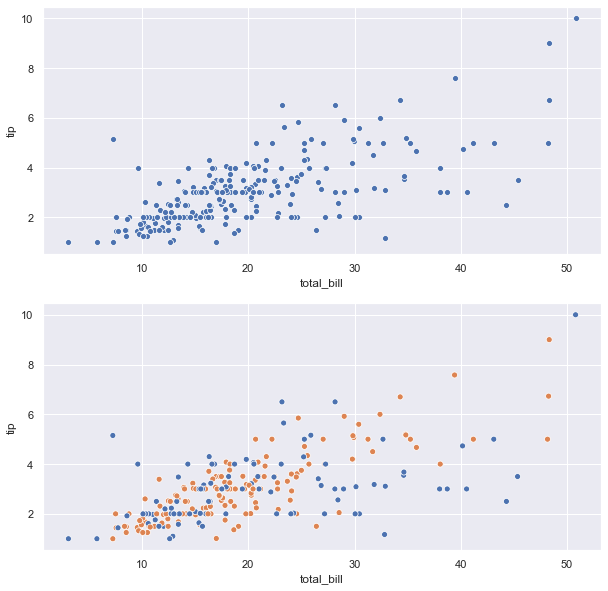

In [137]:
fig, ax=plt.subplots(2,1,figsize=(10,10))
sns.relplot(ax=ax[0],x="total_bill", y="tip", data=tips)
plt.close()
sns.relplot(ax=ax[1],x="total_bill", y="tip", hue='smoker',data=tips)
plt.close()

In [138]:
fig.savefig('a.jpg',dpi=400,bbox_inches='tight')